In [1]:
!pip install langchain-community
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 10.8 MB/s eta 0:00:00


In [2]:
from langchain_community.document_loaders import PyPDFLoader


In [3]:
loader=PyPDFLoader("/content/embedded-systems.pdf")
pdf_pages=loader.load()
pdf_pages[0]


Document(metadata={'producer': 'Acrobat Distiller 4.0 for Windows', 'creator': 'PyPDF', 'creationdate': '1999-05-17T00:46:04+00:00', 'moddate': '2004-07-22T18:57:31+03:00', 'source': '/content/embedded-systems.pdf', 'total_pages': 209, 'page': 0, 'page_label': '1'}, page_content='Embedded Systems Design: An Introduction to Processes, Tools, and \nTechniques \nby Arnold S. Berger ISBN: 1578200733 \nCMP Books © 2002 (237 pages) \nAn easy-to-understand guidebook for those embarking upon an embedded \nprocessor development project.  \n \n \nTable of Contents  \n \n \nEmbedded Systems Design—An Introduction to Processes, Tools, and \nTechniques  \n Preface  \n Introduction  \n Chapter 1 - The Embedded Design Life Cycle \n Chapter 2 - The Selection Process \n Chapter 3 - The Partitioning Decision \n Chapter 4 - The Development Environment \n Chapter 5 - Special Software Techniques \n Chapter 6 - A Basic Toolset \n Chapter 7 - BDM, JTAG, and Nexus \n Chapter 8 - The ICE — An Integrated Soluti

In [4]:
# yt-dlp:
# Used to download audio from YouTube videos.
# We need this because YouTube provides video, not clean audio.
!pip install yt-dlp

# pydub:
# Used for audio processing (convert mp3 to wav, trim, split).
# Whisper works better with clean WAV audio.
!pip install pydub

# faster-whisper:
# Used for speech-to-text (audio → text).
# Faster and lighter version of OpenAI Whisper.
!pip install faster-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.0/39.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.1 MB/s eta 0:00:00


In [5]:
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers.audio import FasterWhisperParser
from langchain_community.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [6]:
url="https://youtu.be/uFhDGagZzjs?si=bHt9nO0x1Qih6ZyT"

save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    FasterWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://youtu.be/uFhDGagZzjs?si=bHt9nO0x1Qih6ZyT
[youtube] uFhDGagZzjs: Downloading webpage


[youtube] uFhDGagZzjs: Downloading android vr player API JSON
[info] uFhDGagZzjs: Downloading 1 format(s): 140
[download] Destination: docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a
[download] 100% of   27.29MiB in 00:00:02 at 11.12MiB/s  
[FixupM4a] Correcting container of "docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a"
[ExtractAudio] Not converting audio docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a; file is already in target format m4a


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able 

In [7]:
docs[1]

Document(metadata={'source': 'docs/youtube/Lecture 01： Introduction to Embedded Systems.m4a', 'timestamps': '[24.00s -> 33.76s]', 'language': 'en', 'probability': '96%'}, page_content=' Kamalikadatta. Now in this course we shall be talking about various aspects of embedded system design.')

In [8]:
len(docs)

219

In [9]:
len(pdf_pages)

209

In [10]:
combian_doc=docs+pdf_pages

In [11]:
len(combian_doc)

428

# Chunking

In [20]:
import langchain
print(langchain.__version__)


1.2.9


In [21]:
!pip install langchain-text-splitters


In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [23]:
chunk_size=1024
chunk_overlap=200

In [24]:
spliter=RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [25]:
chunk_docs=spliter.split_documents(combian_doc)

In [26]:
chunk_docs[0]

Document(metadata={'source': 'docs/youtube/Lecture 01： Introduction to Embedded Systems.m4a', 'timestamps': '[0.00s -> 24.00s]', 'language': 'en', 'probability': '96%'}, page_content='Let me welcome you to this course which will be conducted jointly by myself and Doctor')

In [27]:
len(chunk_docs)

896

# Embedding(semantic search)

What

An encoder model converts text into numerical vectors (embeddings) that capture meaning.

It does not generate text, it only understands it.

Why

Computers can’t understand raw text.

Encoder models make text searchable, comparable, and measurable using vector similarity

in cas rag we take best retrlevel model

In [28]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [29]:
multilingual_embeddings=HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large")

/tmp/ipython-input-917218665.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  multilingual_embeddings=HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large")


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/391 [00:00<?, ?it/s]

XLMRobertaModel LOAD REPORT from: intfloat/multilingual-e5-large
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [49]:
sentence1 = "I like Dhoni and he likes me too"
sentence2 = "I like Kohli and he likes me too"
sentence3 = "Tesla launched a new vehicle"


In [50]:
empedd1=multilingual_embeddings.embed_query(sentence1)
empedd2=multilingual_embeddings.embed_query(sentence2)
empedd3=multilingual_embeddings.embed_query(sentence3)

In [51]:
len(multilingual_embeddings.embed_query(sentence1))

1024

find semantic

In [52]:
import numpy as np


In [53]:
np.dot(empedd1,empedd2)

np.float64(0.955530045567691)

In [54]:
np.dot(empedd1,empedd3)

np.float64(0.7768621085149494)

# vector database

A vector database is used to store embeddings generated from text or data. It allows fast similarity search between vectors. This makes it possible to retrieve information based on meaning rather than exact words.

**HNNSW**

HNSW (Hierarchical Navigable Small World) is a graph-based algorithm used for approximate nearest neighbor search in vector databases. It organizes vectors into multiple hierarchical layers of small-world graphs. During search, it starts at the top layer to quickly find a close region, then moves down through layers to refine results. This structure enables very fast similarity search with high accuracy, even on large datasets. HNSW is widely used in vector databases like FAISS, Milvus, and Weaviate to efficiently retrieve semantically similar embeddings.

VECTOR DB - CHROMA

In [62]:
!pip install chromadb --quiet

In [63]:
from langchain_community.vectorstores import Chroma


In [64]:
present_directory="/db/chroma"

In [66]:
vectordb = Chroma.from_documents(
    documents=chunk_docs,
    embedding=multilingual_embeddings,
    persist_directory=present_directory
)


In [67]:
question="how to do testing in Embedded system?"

In [68]:
vectordb.similarity_search(question,k=3)

[Document(metadata={'page_label': '157', 'producer': 'Acrobat Distiller 4.0 for Windows', 'moddate': '2004-07-22T18:57:31+03:00', 'source': '/content/embedded-systems.pdf', 'total_pages': 209, 'creator': 'PyPDF', 'creationdate': '1999-05-17T00:46:04+00:00', 'page': 156}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

In [69]:
vectordb.similarity_search_with_score(question,k=3)

[(Document(metadata={'creator': 'PyPDF', 'page_label': '157', 'source': '/content/embedded-systems.pdf', 'page': 156, 'moddate': '2004-07-22T18:57:31+03:00', 'total_pages': 209, 'creationdate': '1999-05-17T00:46:04+00:00', 'producer': 'Acrobat Distiller 4.0 for Windows'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniq

# Retrieval

**Max Marginal Relevance (MMR) search helps avoid duplicate,diverse or very similar results.**

In [70]:
vectordb.max_marginal_relevance_search(question,k=3,fetch_k=10)

[Document(metadata={'total_pages': 209, 'creationdate': '1999-05-17T00:46:04+00:00', 'page_label': '157', 'source': '/content/embedded-systems.pdf', 'moddate': '2004-07-22T18:57:31+03:00', 'creator': 'PyPDF', 'page': 156, 'producer': 'Acrobat Distiller 4.0 for Windows'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

# Meta Data filtering

In [74]:
vectordb.similarity_search(question,k=3,filter={"source":"/content/embedded-systems.pdf"})

[Document(metadata={'page': 156, 'moddate': '2004-07-22T18:57:31+03:00', 'page_label': '157', 'creationdate': '1999-05-17T00:46:04+00:00', 'producer': 'Acrobat Distiller 4.0 for Windows', 'total_pages': 209, 'source': '/content/embedded-systems.pdf', 'creator': 'PyPDF'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

# Groq

In [75]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 4.4 MB/s eta 0:00:00


In [83]:
import getpass
import os

# Set GROQ API key
if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your GROQ API key: ")

In [89]:
import os, getpass

os.environ.pop("GROQ_API_KEY", None)  # remove old key if exists
os.environ["GROQ_API_KEY"] = getpass.getpass("Enter NEW Groq API key: ")


Enter NEW Groq API key: ··········


In [90]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=250,
)

In [92]:
response=llm.invoke("writa apoime about nature")

In [94]:
response.content

'**The Serenity of Nature**\n\nAs I stand at the edge of the forest, the warm sunlight filters through the leaves, casting dappled shadows on the forest floor. The gentle rustle of the trees in the breeze is like a soothing melody, calming my mind and transporting me to a world of serenity. The scent of blooming wildflowers wafts through the air, filling my senses with their sweet fragrance.\n\nThe forest is alive, teeming with life and energy. Birds flit through the trees, their songs a chorus of joy and freedom. The rustle of small creatures through the underbrush is a reminder of the intricate web of life that exists here. Every step I take reveals a new wonder, a new discovery that fills me with awe and appreciation for the natural world.\n\nAs I walk along the winding path, the sound of a nearby stream grows louder. I follow the sound and come upon a crystal-clear brook, its waters glistening in the sunlight. The gentle flow of the water is mesmerizing, a soothing balm for my soul

# prompt engineering

user for get accurat result.
role,instruction,content,example

In [95]:
system_prompt = (
  "You are an assistant for question-answering tasks. Use the following pieces of retrieved content to answer the question."
  "If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise."
  "Answer all questions to the best of your ability."
)


In [102]:
from langchain_core.messages import SystemMessage,HumanMessage,AIMessage

In [104]:
systemmessage=SystemMessage(content=system_prompt)

In [105]:
question="how to do testing in embeddingsystem"

In [106]:
vectordb.similarity_search(question,k=3)

[Document(metadata={'moddate': '2004-07-22T18:57:31+03:00', 'creator': 'PyPDF', 'producer': 'Acrobat Distiller 4.0 for Windows', 'page_label': '157', 'total_pages': 209, 'creationdate': '1999-05-17T00:46:04+00:00', 'source': '/content/embedded-systems.pdf', 'page': 156}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

In [109]:
docs=vectordb.similarity_search_with_score(question,k=5)

In [110]:
import pandas as pd

_docs = pd.DataFrame(
    [
        {
            'query': question,
            'paragraph': doc[0].page_content,
            'document': doc[0].metadata.get("source"),
            'page_number': doc[0].metadata.get("page"),
            'relevant_score': doc[1]
        }
        for doc in docs
    ]
)


In [111]:
_docs

,query,paragraph,document,page_number,relevant_score
0,how to do testing in embeddingsystem,Chapter 9: Testing \nEmbedded systems software...,/content/embedded-systems.pdf,156.0,0.258838
1,how to do testing in embeddingsystem,chosen based on a guess about what errors are ...,/content/embedded-systems.pdf,163.0,0.267823
2,how to do testing in embeddingsystem,embedded hardware. \n Real-world events are u...,/content/embedded-systems.pdf,163.0,0.272204
3,how to do testing in embeddingsystem,embedded system has life or death consequences...,/content/embedded-systems.pdf,27.0,0.281875
4,how to do testing in embeddingsystem,respond to the inputs. Now how can we define a...,docs/youtube/Lecture 01： Introduction to Embed...,NaN,0.288229


In [113]:
context="\n\n".join(_docs['paragraph'])

In [114]:
context

'Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details unique to embedded systems \nwork along the way. \nWhy Test? \nBefore you begin designing tests, it’s important to have a clear understanding of \nwhy you are testing. This understanding influences which tests you stress and \n(more importantly) how early you begin testing. In general, you

In [115]:
humanmeaasge=[HumanMessage(content=context+question)]

In [118]:
formatted_str = (systemmessage + humanmeaasge).format_prompt().to_string()
result = llm.invoke(formatted_str)


In [120]:
result.content

'An embedded system can be defined as a computer system that is designed to perform a specific function or set of functions, often with real-time constraints, and is typically used in applications where human lives are at stake or where reliability is critical. It is characterized by its ability to run reliably without crashing for long periods of time, and often compensates for problems with the embedded hardware.'

In [121]:
question="about indian nature "

In [124]:
docs=vectordb.similarity_search_with_score(question,k=5)
_docs = pd.DataFrame(
    [
        {
            'query': question,
            'paragraph': doc[0].page_content,
            'document': doc[0].metadata.get("source"),
            'page_number': doc[0].metadata.get("page"),
            'relevant_score': doc[1]
        }
        for doc in docs
    ]
)
context="\n\n".join(_docs['paragraph'])
human_message = HumanMessage(content=context + question)
formatted_str = (systemmessage + humanmeaasge).format_prompt().to_string()
result = llm.invoke(formatted_str)

In [125]:
result.content

'An embedded system can be defined as a computer system that is designed to perform a specific function or set of functions, often with real-time constraints, and is typically used in applications where human lives are at stake or where reliability is critical. It is characterized by its ability to run reliably without crashing for long periods of time, and often compensates for problems with the embedded hardware.'

# Memory

In [126]:
!pip install langgraph

In [127]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

workflow = StateGraph(state_schema=MessagesState)

# Define the function that calls the model
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability."
    )
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = llm.invoke(messages)
    return {"messages": response}

# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

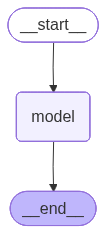

In [128]:
app

In [129]:
app.invoke(
    {"messages": [HumanMessage(content="Translate to French: I love programming.")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: I love programming.', additional_kwargs={}, response_metadata={}, id='7920ade4-cd97-421d-9fd7-12351447eb1e'),
  AIMessage(content='The translation of "I love programming" to French is:\n\n"J\'adore le programmation."\n\nHowever, a more common and idiomatic way to express this in French would be:\n\n"Je suis passionné(e) par la programmation."\n\nThis translation conveys a stronger sense of enthusiasm and passion for programming.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 59, 'total_tokens': 124, 'completion_time': 0.103618526, 'completion_tokens_details': None, 'prompt_time': 0.004115716, 'prompt_tokens_details': None, 'queue_time': 0.065053104, 'total_time': 0.107734242}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_d317489708', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c4701-c0e9-7

In [130]:
app.invoke(
    {"messages": [HumanMessage(content="What did I ask you?")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: I love programming.', additional_kwargs={}, response_metadata={}, id='7920ade4-cd97-421d-9fd7-12351447eb1e'),
  AIMessage(content='The translation of "I love programming" to French is:\n\n"J\'adore le programmation."\n\nHowever, a more common and idiomatic way to express this in French would be:\n\n"Je suis passionné(e) par la programmation."\n\nThis translation conveys a stronger sense of enthusiasm and passion for programming.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 59, 'total_tokens': 124, 'completion_time': 0.103618526, 'completion_tokens_details': None, 'prompt_time': 0.004115716, 'prompt_tokens_details': None, 'queue_time': 0.065053104, 'total_time': 0.107734242}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_d317489708', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c4701-c0e9-7

In [131]:
app.invoke(
    {"messages": [HumanMessage(content="What did I ask you?")]},
    config={"configurable": {"thread_id": "13"}},
)

{'messages': [HumanMessage(content='What did I ask you?', additional_kwargs={}, response_metadata={}, id='15029d54-99c6-4b7d-929f-d588161563d2'),
  AIMessage(content="You asked me what you asked me. Your initial question was to let me know that I'm a helpful assistant and to answer all your questions to the best of my ability.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 57, 'total_tokens': 93, 'completion_time': 0.098529683, 'completion_tokens_details': None, 'prompt_time': 0.004848688, 'prompt_tokens_details': None, 'queue_time': 0.22962337, 'total_time': 0.103378371}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c4703-a335-7b43-b04a-bc474b3cf8ab-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 57, 'output_tokens': 36, 'total_tokens': 93})]}